# Stochastic Gradient Descent (SGD)
> plain SGD.

- toc: true 
- badges: true
- categories: [jupyter]

In [12]:
%matplotlib inline
from fastai.basics import *

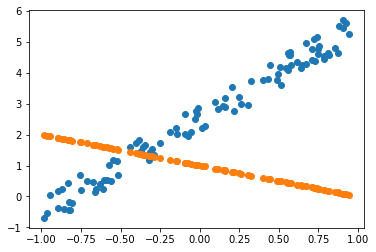

In [13]:
n = 100
x = torch.ones(n, 2) 
x[:,0].uniform_(-1.,1)
a = tensor(3., 2); a
y = x @ a + torch.rand(n)
a = tensor(-1.,1)
y_hat = x @ a
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat);

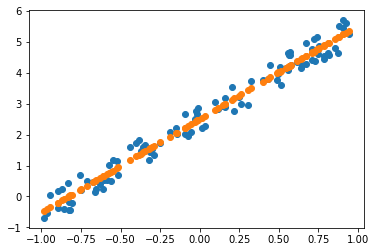

In [14]:
lr = 1e-1
def mse(y, y_hat): 
    return ((y_hat - y) **2 ).mean()
def update():
    y_hat = x @ a
    loss = mse(y, y_hat)
    # if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()
a = nn.Parameter(tensor(-1.,1)); a
for t in range(100): 
    update()
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x @ a.detach());

In [15]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

a = nn.Parameter(tensor(-1.,1)); a 
fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x @ a.detach())
plt.close()
def animate(i):
    update()
    line.set_ydata(x @ a.detach())
    return line,
animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)